## **Survival Prediction of Titanic Passengers**

Specila thanks to [Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python) & [Ashwini Swain](https://www.kaggle.com/ash316/eda-to-prediction-dietanic) which provided base for this kernel.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data = [train, test]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Since there are missing values in Age, Cabin and Embarked. We will look into this later in this notebook.
# *1. Lets do some Feature Engineering & EDA*
Firstly, analyzing categorical variables with target variable
### 1.1. Pclass

In [6]:
train.loc[:,["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


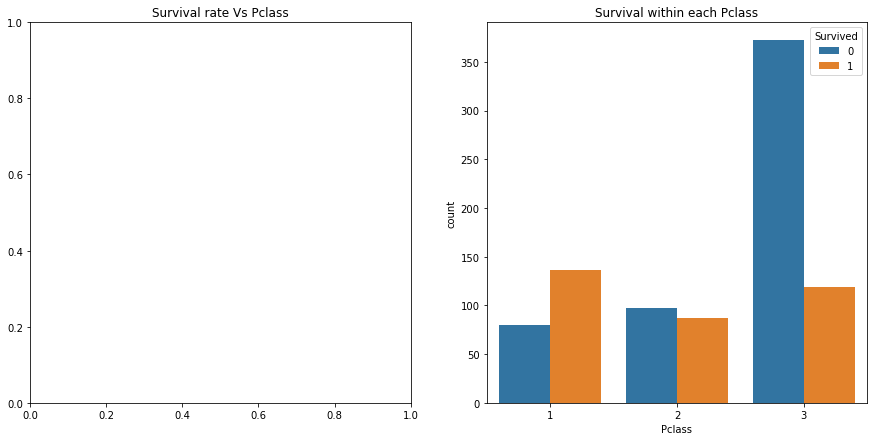

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.factorplot("Pclass", "Survived", data=train, ax=ax[0])
ax[0].set_title("Survival rate Vs Pclass")
sns.countplot("Pclass",hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Survival within each Pclass")
plt.close()

Most survival chances for Pclass of 1  which means upper class is expected to survive than others. Although most of passengers were from Pclass 3. Inspite of this, high death rate for this Pclass.
### 1.2. Sex

In [8]:
train.loc[:, ["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


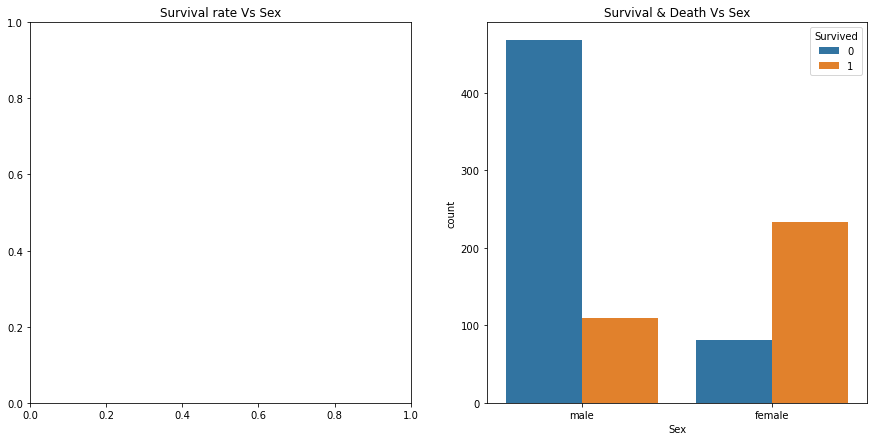

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
sns.factorplot("Sex", "Survived", data=train, ax=ax[0])
ax[0].set_title("Survival rate Vs Sex")
sns.countplot("Sex", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Survival & Death Vs Sex")
plt.close()
plt.show()

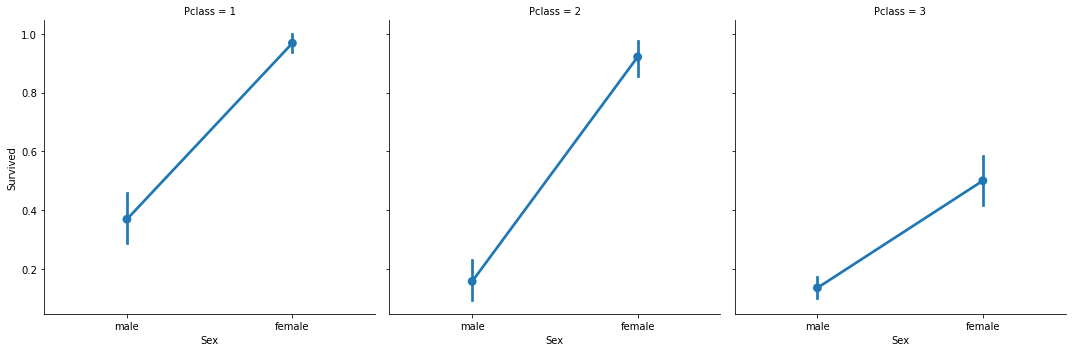

In [12]:
sns.factorplot("Sex", "Survived", col="Pclass", data=train)

Females are expected to be given priority during rescue apart from whihc Pclass they belongs to. Survival rate is almost 100% for females of Pclass 1. With respect to this analysis, <b>Pclass</b> and <b>Sex</b> is contributing very clearly in prediction of survival rate.

### 1.3. Embarked

In [13]:
train.loc[:, ["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


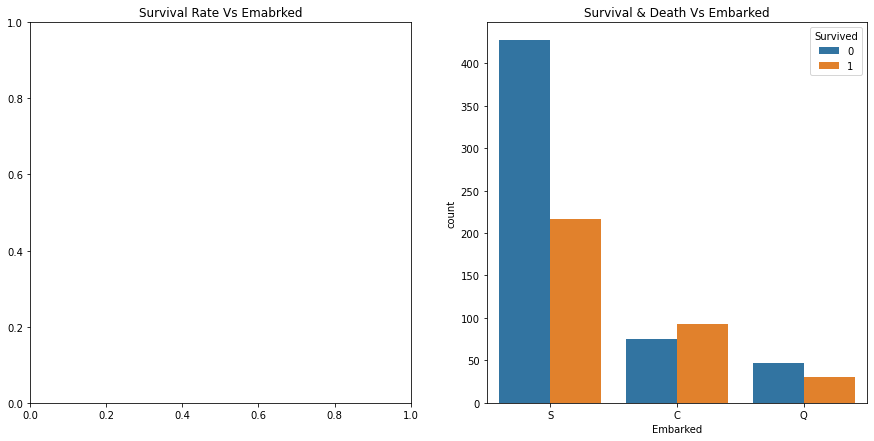

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.factorplot("Embarked", "Survived", data=train, ax=ax[0])
ax[0].set_title("Survival Rate Vs Emabrked")
sns.countplot("Embarked", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Survival & Death Vs Embarked")
plt.close()
plt.show()

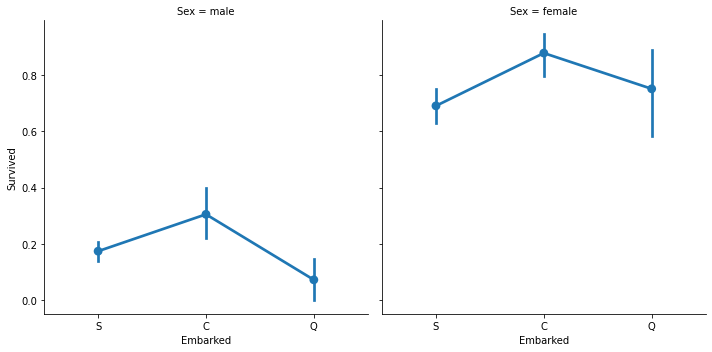

In [15]:
sns.factorplot("Embarked", "Survived", col="Sex", data=train)
plt.show()

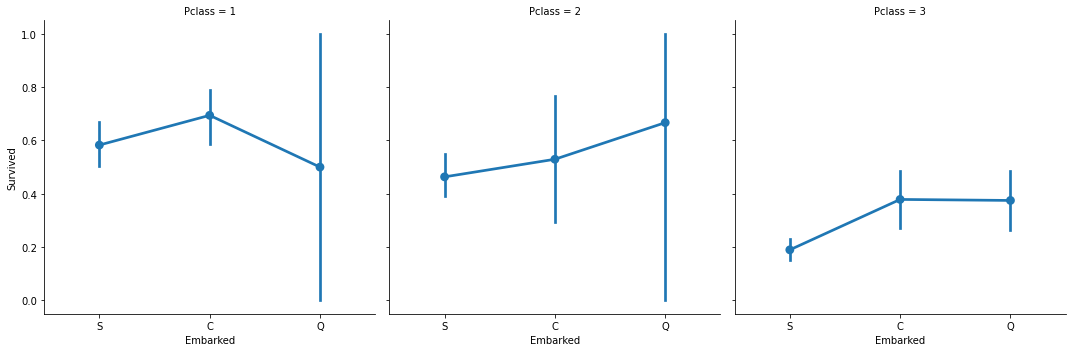

In [16]:
sns.factorplot("Embarked", "Survived", col="Pclass", data=train)
plt.show()

<p>By looking at the above graphs, this conclusion is drawn that those passengers embarked from cherbourg are the luckiest because there survival rate is very high among others. Till now, variables which are found to have more importance are Sex, Pclass, Embarked. For example, Female having Pclass of 1 and embarked from cherbourg has the highest survival chance.</p>

### 1.4. Name
To get title from the name, defining a function named get_title

In [17]:
def get_title(name):
    title = re.search(" ([A-Za-z]+)\.", name)
    if title:
        return title.group(1)
    else:
        return ""

In [18]:
train["Title"] = train["Name"].apply(get_title)
test["Title"] = test["Name"].apply(get_title)

In [19]:
for dataset in full_data:
    dataset["Title"] = dataset["Title"].replace(["Sir", "Rev", "Capt", "Col", "Countess", "Lady", "Don", "Dr", "Major", 
                                                 "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Mme"], "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Mrs")

In [20]:
train["Title"].unique(), test["Title"].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object))

In [21]:
train.loc[:, ["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


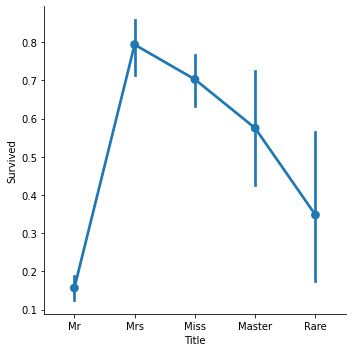

In [22]:
sns.factorplot("Title", "Survived", data=train)
plt.show()

Highest survival rate for passengers having **Title** of **Mrs** while least with **Mr**. NOW, Analyzing numerical features.

### 1.5. SibSp and Parch
<p>Creating another feature Family Members by combining SibSip & Parch, add 1 to count concern passenger himself</p>

In [23]:
for dataset in full_data:
    dataset["FamilyMembers"] = dataset["SibSp"] + dataset["Parch"] + 1

In [24]:
train.loc[:, ["FamilyMembers", "Survived"]].groupby("FamilyMembers").mean()

,Survived
FamilyMembers,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


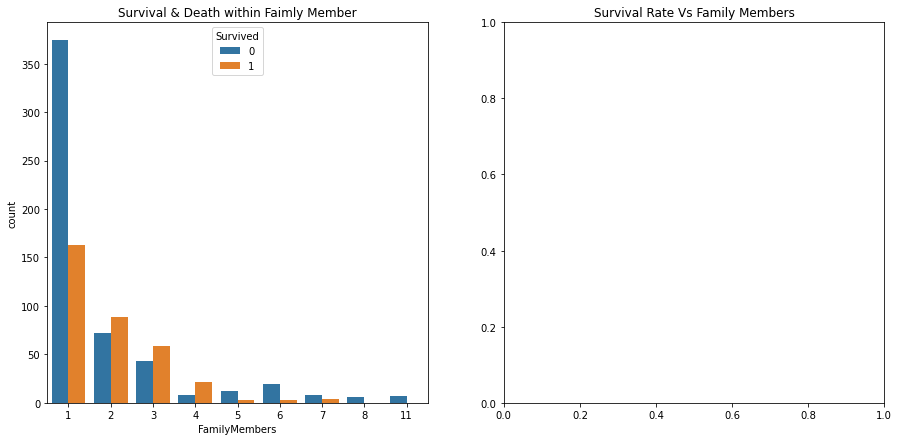

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot("FamilyMembers", hue="Survived", data=train, ax=ax[0])
ax[0].set_title("Survival & Death within Faimly Member")
sns.factorplot("FamilyMembers", "Survived", data=train, ax=ax[1])
ax[1].set_title("Survival Rate Vs Family Members")
plt.close()
plt.show()

Highest survival rate for those with family size of 4. Not alone passenger was given priority in rescue that's why the survival rate for alone passengers is low. None of passenger survived with family size of more than 8. 
### 1.6. Age

In [26]:
(train["Age"].isnull().sum() + test["Age"].isnull().sum())/(len(train)+len(test))

0.20091673032849502

<p>Since, 20% of Age records are missing from the dataset. Thus we first have to fill those values.<br>There are two possibilities to do that, either by mean of whole age column or by mean of each category such as children, adult etc. It seems good to count null values by category and fill with the mean of corresponding category.</p>

In [27]:
fill_age = train[["Title", "Age"]].groupby(["Title"]).mean()

In [28]:
train.loc[(train["Age"].isnull()) & (train["Title"]=="Master"), "Age"] = fill_age.loc["Master","Age"]
train.loc[(train["Age"].isnull()) & (train["Title"]=="Miss"), "Age"] = fill_age.loc["Miss","Age"]
train.loc[(train["Age"].isnull()) & (train["Title"]=="Mr"), "Age"] = fill_age.loc["Mr","Age"]
train.loc[(train["Age"].isnull()) & (train["Title"]=="Mrs"), "Age"] = fill_age.loc["Mrs","Age"]
train.loc[(train["Age"].isnull())&(train["Title"]=="Rare"), "Age"] = fill_age.loc["Rare", "Age"]

In [29]:
train["Age"].isnull().sum()

0

NOW, there is no null value in Age column but its not enough for modeling. We must have to convert the continous value to the categorical value either by using bins or normalization. 
Since we have five categories in **Title**, so i am categorizing **Age** into five as well.

In [30]:
for dataset in full_data:
    dataset["CategoricalAge"] = pd.qcut(dataset["Age"], 5)

In [31]:
train.loc[:, ["CategoricalAge", "Survived"]].groupby(["CategoricalAge"]).mean()

,Survived
CategoricalAge,
"(0.419, 20.0]",0.459016
"(20.0, 26.0]",0.397727
"(26.0, 32.368]",0.272358
"(32.368, 38.0]",0.509259
"(38.0, 80.0]",0.370787


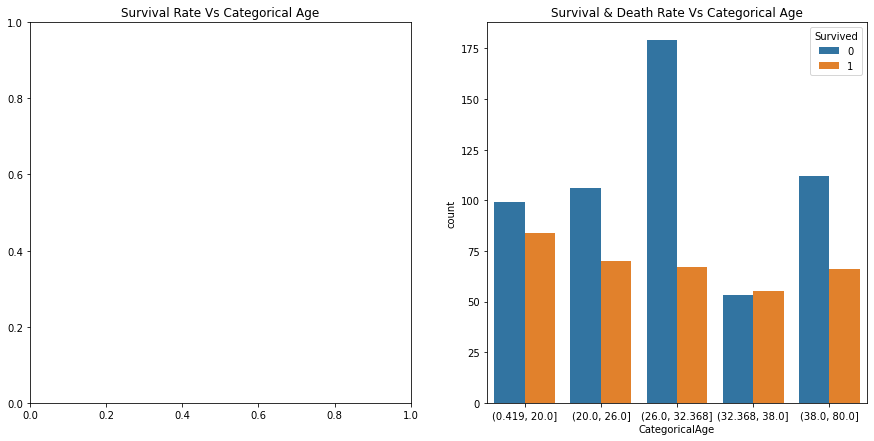

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.factorplot("CategoricalAge", "Survived", data=train, ax=ax[0])
ax[0].set_title("Survival Rate Vs Categorical Age")
sns.countplot("CategoricalAge", hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Survival & Death Rate Vs Categorical Age")
plt.close()
plt.show()

**Age** is seems to be an important feature because there is trend in survival rate with respect to age category. Least survival rate for passengers within age group of 26-32 while highest for 32-38. To make model understand countinous features, we should cinvert them into categories (ordinal). Lets categorize the age column:

In [33]:
for dataset in full_data:
    dataset["Age_Cat"] = 0
    dataset.loc[dataset["Age"]<=20.0, "Age_Cat"] = 1
    dataset.loc[(dataset["Age"]>20.0)&(dataset["Age"]<=26.0), "Age_Cat"] = 2
    dataset.loc[(dataset["Age"]>26.0)&(dataset["Age"]<=32.368), "Age_Cat"] = 3
    dataset.loc[(dataset["Age"]>32.368)&(dataset["Age"]<=38.0), "Age_Cat"] = 4
    dataset.loc[(dataset["Age"]>38.0)&(dataset["Age"]<=80.0), "Age_Cat"] = 5

In [34]:
dataset.loc[(dataset["Age"]>26.0)&(dataset["Age"]<=32.368)&(dataset["Age_Cat"]==3), "Age"].mean()
# dataset.loc[(dataset["Age"]>32.368)&(dataset["Age"]<=38.0), "Age_Cat"].count()

29.189655172413794

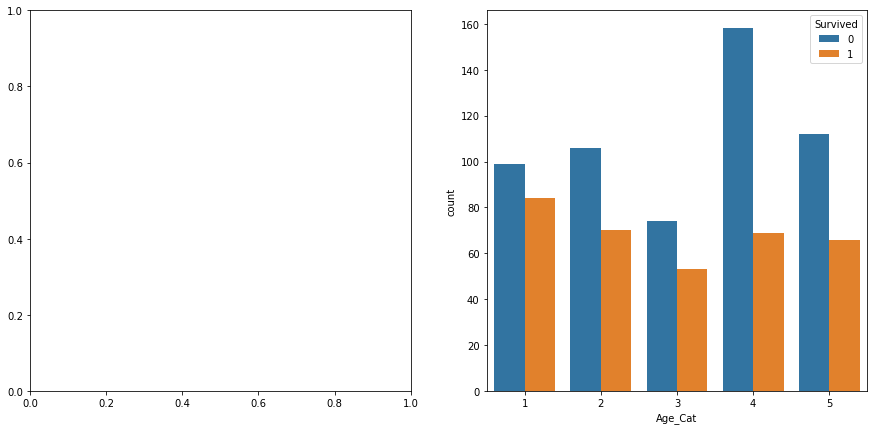

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.factorplot("Age_Cat", "Survived", data=train, ax=ax[0])
sns.countplot("Age_Cat", hue="Survived", data=train, ax=ax[1])
plt.close()

Another column with null values is **Fare**. Lets fill its null values by some appropriate values.
### 1.7. Fare

In [36]:
# Checking mean and median to get the idea either data is skewed or not.
for dataset in full_data:
    print(dataset["Fare"].mean(), dataset["Fare"].median())

32.204207968574636 14.4542
35.627188489208635 14.4542


Since, Mean is greater than median which shows data is right skewed. That's why we should use median to impute the data

In [37]:
for dataset in full_data:
    dataset.loc[dataset["Fare"].isnull(), "Fare"] = dataset["Fare"].median()
    dataset["CategoricalFare"] = pd.qcut(dataset["Fare"], 5)

In [38]:
train.loc[:,["CategoricalFare", "Survived"]].groupby(["CategoricalFare"], as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


It also to be a good feature because survival rate varies with the variation in Fare. Highest survival rate for the highest fare.

In [39]:
for dataset in full_data:
    dataset["Fare_Cat"] = 0
    dataset.loc[dataset["Fare"]<=7.854, "Fare_Cat"] = 1
    dataset.loc[(dataset["Fare"]>7.854)&(dataset["Fare"]<=10.5), "Fare_Cat"] = 2
    dataset.loc[(dataset["Fare"]>10.5)&(dataset["Fare"]<=21.679), "Fare_Cat"] = 3
    dataset.loc[(dataset["Fare"]>21.679)&(dataset["Fare"]<=39.688), "Fare_Cat"] = 4
    dataset.loc[(dataset["Fare"]>39.688)&(dataset["Fare"]<=512.329), "Fare_Cat"] = 5

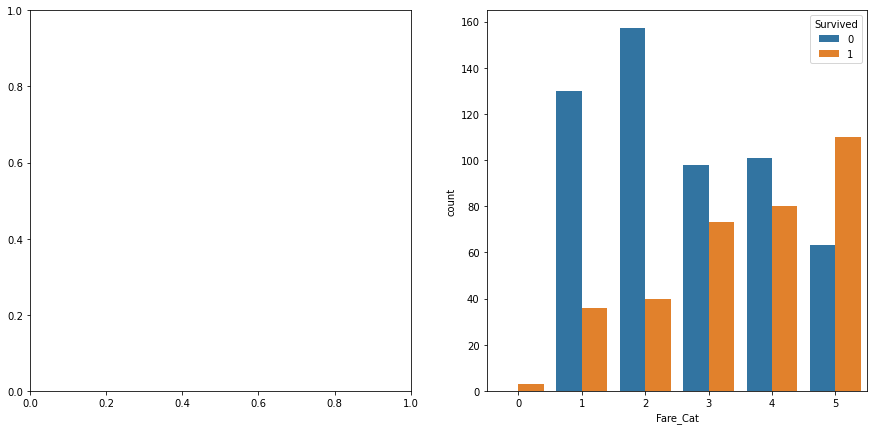

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.factorplot("Fare_Cat", "Survived", data=train, ax=ax[0])
sns.countplot("Fare_Cat", hue="Survived", data=train, ax=ax[1])
plt.close()

NOW, its turn to convert categorical features (Title, Sex, Embarked) to numerical because model will not be able to processs the string values as feature.

# *2. Categorical Feature to Numerical Feature:*

In [41]:
# Encoding Sex
for dataset in full_data:
    dataset["Sex"] = dataset["Sex"].astype("category")
    dataset["Sex"] = dataset["Sex"].cat.codes

We converted **Sex** into categories because it has only two possible values. We cannot convert **Embarked** & **Title** variables in this way because they are nominal like **Sex** but having more than two categories.

In [42]:
# Encoding Emabrked & Title
train = pd.get_dummies(train, columns=["Embarked", "Title"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked", "Title"], drop_first=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CategoricalAge,Age_Cat,CategoricalFare,Fare_Cat,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,"(20, 26]",2,"[0, 7.854]",1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,"(32.368, 38]",4,"(39.688, 512.329]",5,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,"(20, 26]",2,"(7.854, 10.5]",2,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,"(32.368, 38]",4,"(39.688, 512.329]",5,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,"(32.368, 38]",4,"(7.854, 10.5]",2,0,1,0,1,0,0


In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,CategoricalAge,Age_Cat,CategoricalFare,Fare_Cat,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,...,"(30, 42]",4,"(7.796, 11.342]",1,1,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,...,"(42, 76]",5,"[0, 7.796]",1,0,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,...,"(42, 76]",5,"(7.796, 11.342]",2,1,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,...,"(25, 30]",3,"(7.796, 11.342]",2,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,...,"(20, 25]",2,"(11.342, 21.196]",3,0,1,0,0,1,0


In [45]:
plt.figure(figsize=(10, 8))
sns.countplot("Survived", data=train)

Above graph shows that data is imbalance. More than 500 belongs to those who didn't survive while more than 300 survived. Lets plot some graph to show the difference in percent (%).

In [46]:
plt.figure(figsize=(10,8))
train["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", shadow=True)

62% of training data belongs to class 0 while rest belongs to the class 1. NOW, Lets visualize some other features with respect to target variable.

# *3. Feature Selection*
Lets drop some irrelevant columns

In [47]:
drop_cols = ["PassengerId", "Name", "Age","SibSp", "Parch", "Ticket", "Fare", "Cabin", "CategoricalAge", "CategoricalFare"]

In [48]:
train_x = train.drop(drop_cols, axis=1)
test_x = test.drop(drop_cols, axis=1)

In [49]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_x.corr(), annot=True, cmap="RdYlGn", annot_kws={"Size":10})

# *4. Data Modeling*

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\DL-Researcher\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
train_x.shape, test_x.shape

((891, 12), (418, 11))

In [52]:
train_x = train_x.iloc[:, 1:]
train_y = train.iloc[:, 1]

In [53]:
assert train_x.shape[1] == test_x.shape[1]

In [54]:
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)
lr_predictions = lr_model.predict(test_x)
lr_model.score(train_x, train_y)

0.8294051627384961

In [55]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)
dt_predictions = dt_model.predict(test_x)
dt_model.score(train_x, train_y)

0.9001122334455668

In [56]:
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
rf_predictions = rf_model.predict(test_x)
rf_model.score(train_x, train_y)

0.8967452300785634

In [57]:
AdaBoost_model = AdaBoostClassifier()
AdaBoost_model.fit(train_x, train_y)
AdaBoost_predictions = AdaBoost_model.predict(test_x)
AdaBoost_model.score(train_x, train_y)

0.8215488215488216

In [58]:
GB_model = GradientBoostingClassifier()
GB_model.fit(train_x, train_y)
GB_predictions = GB_model.predict(test_x)
GB_model.score(train_x, train_y)

0.8641975308641975

In [59]:
svc_model = SVC()
svc_model.fit(train_x, train_y)
svc_predictions = svc_model.predict(test_x)
svc_model.score(train_x, train_y)

0.8361391694725028

In [60]:
bag_model = BaggingClassifier()
bag_model.fit(train_x, train_y)
bag_predictions = bag_model.predict(test_x)
bag_model.score(train_x, train_y)

0.8967452300785634

Highest prediction rate for Decision Tree Classifier followed by Bagging Classifier. Thus, submitting predictions made from Decision Tree classifier.

In [61]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
             "Survived": dt_predictions})

In [62]:
submission["Survived"].value_counts()

0    272
1    146
Name: Survived, dtype: int64

In [63]:
len(submission)

418

In [64]:
submission.to_csv("submission.csv")